## 💻 **Online Retail Transaction Analysis:** 🛒

## **Metadata:**

Online Retail.xlsx is a dataset containing information about online transactions between 01/12/2010 and 09/12/2012 for a UK-based online retail.

The dataset lists the following information: 
* Invoice number (to indentify transactions), 
* Stock Code(Product code)
* Description (Product Name)
* Quantity(ordered of each product per transaction)
* Invoice date (date and time of the transaction)
* Unit Price(Product price per unit in sterling)
* Customer ID
* Country (the customer resides in)


This dataset contains numeric and nominal (specifically sequential, multivariate, and time-series data) for 541090 transactions.

Importing standard libraries:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import timedelta
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_excel("Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,548550,22662,LUNCH BAG DOLLY GIRL DESIGN,10,2011-04-01 08:22:00,1.65,18161.0,United Kingdom
1,548550,22296,HEART IVORY TRELLIS LARGE,12,2011-04-01 08:22:00,1.65,18161.0,United Kingdom
2,548550,21790,VINTAGE SNAP CARDS,12,2011-04-01 08:22:00,0.85,18161.0,United Kingdom
3,548550,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2011-04-01 08:22:00,9.95,18161.0,United Kingdom
4,548550,22393,PAPERWEIGHT VINTAGE COLLAGE,6,2011-04-01 08:22:00,2.55,18161.0,United Kingdom


In [ ]:
# Converting InvoiceDate column to datetime objects
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%Y-%m-%d")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,548550,22662,LUNCH BAG DOLLY GIRL DESIGN,10,2011-04-01 08:22:00,1.65,18161.0,United Kingdom
1,548550,22296,HEART IVORY TRELLIS LARGE,12,2011-04-01 08:22:00,1.65,18161.0,United Kingdom
2,548550,21790,VINTAGE SNAP CARDS,12,2011-04-01 08:22:00,0.85,18161.0,United Kingdom
3,548550,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2011-04-01 08:22:00,9.95,18161.0,United Kingdom
4,548550,22393,PAPERWEIGHT VINTAGE COLLAGE,6,2011-04-01 08:22:00,2.55,18161.0,United Kingdom


* There are orders in the dataset contianing negative values for quantity
* The corresponding invoice numbers for these quantities begin with "C", meaning they are cancelled
* These values must be removed so that they do not hinder with the anlaysis 

In [ ]:
df = df[~df.InvoiceNo.str.contains("C", na=False)]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,548550,22662,LUNCH BAG DOLLY GIRL DESIGN,10,2011-04-01 08:22:00,1.65,18161.0,United Kingdom
1,548550,22296,HEART IVORY TRELLIS LARGE,12,2011-04-01 08:22:00,1.65,18161.0,United Kingdom
2,548550,21790,VINTAGE SNAP CARDS,12,2011-04-01 08:22:00,0.85,18161.0,United Kingdom
3,548550,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2011-04-01 08:22:00,9.95,18161.0,United Kingdom
4,548550,22393,PAPERWEIGHT VINTAGE COLLAGE,6,2011-04-01 08:22:00,2.55,18161.0,United Kingdom


In [ ]:
# Checking for null values
df.isna().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [ ]:
# Dropping rows with null values
df.dropna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,548550,22662,LUNCH BAG DOLLY GIRL DESIGN,10,2011-04-01 08:22:00,1.65,18161.0,United Kingdom
1,548550,22296,HEART IVORY TRELLIS LARGE,12,2011-04-01 08:22:00,1.65,18161.0,United Kingdom
2,548550,21790,VINTAGE SNAP CARDS,12,2011-04-01 08:22:00,0.85,18161.0,United Kingdom
3,548550,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2011-04-01 08:22:00,9.95,18161.0,United Kingdom
4,548550,22393,PAPERWEIGHT VINTAGE COLLAGE,6,2011-04-01 08:22:00,2.55,18161.0,United Kingdom
...,...,...,...,...,...,...,...,...
399821,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
399822,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
399823,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
399824,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## **Calculate the RFM values for each customer (by customer id)**

* Sort customers based on each: recency, frequency, and monetary values
* December 2011 is also the last month listed in the given data
* So we can use the last listed date in the set to check for recency

In [ ]:
# Defining the last listed date for further calculations
end_date = df['InvoiceDate'].max() + timedelta(days=1)
print(end_date)

2011-12-10 12:50:00


In [ ]:
# Calculating the recency of each purchase
rec = df.groupby(by='CustomerID', as_index=False)["InvoiceDate"].max() 
rec.columns = ["CustomerID", "InvoiceDate"]

rec['Recency'] = rec['InvoiceDate'].apply(lambda x: (end_date.year - x.year) * 12 + (end_date.month - x.month))
rec

,CustomerID,InvoiceDate,Recency
0,12347.0,2011-12-07 15:52:00,0
1,12348.0,2011-09-25 13:13:00,3
2,12349.0,2011-11-21 09:51:00,1
3,12352.0,2011-11-03 14:37:00,1
4,12353.0,2011-05-19 17:47:00,7
...,...,...,...
3845,18278.0,2011-09-27 11:58:00,3
3846,18281.0,2011-06-12 10:53:00,6
3847,18282.0,2011-12-02 11:43:00,0
3848,18283.0,2011-12-06 12:02:00,0


In [ ]:
# Calculating the frequency of purchases per customer ID
freq = df.drop_duplicates().groupby(by=['CustomerID'], as_index=False)['InvoiceDate'].count()
freq.columns = ['CustomerID', 'Frequency']
freq

,CustomerID,Frequency
0,12347.0,122
1,12348.0,8
2,12349.0,73
3,12352.0,47
4,12353.0,4
...,...,...
3845,18278.0,9
3846,18281.0,7
3847,18282.0,12
3848,18283.0,591


In [ ]:
# Calculating the total amount consumers have spent per ID

df['Total'] = df['UnitPrice'] * df['Quantity']
monet = df.groupby(by='CustomerID', as_index=False)['Total'].sum()
monet.columns = ['CustomerID', 'Monetary']
monet

,CustomerID,Monetary
0,12347.0,3122.82
1,12348.0,677.00
2,12349.0,1757.55
3,12352.0,944.23
4,12353.0,89.00
...,...,...
3845,18278.0,173.90
3846,18281.0,80.82
3847,18282.0,178.05
3848,18283.0,1776.98


In [ ]:
# Combining everything together by merging on customer ID

merged = rec.merge(freq, on="CustomerID")
merged = merged.merge(monet, on="CustomerID")
merged.drop(columns=['InvoiceDate'], inplace=True)
merged

,CustomerID,Recency,Frequency,Monetary
0,12347.0,0,122,3122.82
1,12348.0,3,8,677.00
2,12349.0,1,73,1757.55
3,12352.0,1,47,944.23
4,12353.0,7,4,89.00
...,...,...,...,...
3845,18278.0,3,9,173.90
3846,18281.0,6,7,80.82
3847,18282.0,0,12,178.05
3848,18283.0,0,591,1776.98


In [ ]:
# Turning everything into numpy arrays

merged_np = merged[["Recency", "Frequency", "Monetary"]]
merged_np = merged_np.to_numpy()
print(merged_np)

[[0.00000e+00 1.22000e+02 3.12282e+03]
 [3.00000e+00 8.00000e+00 6.77000e+02]
 [1.00000e+00 7.30000e+01 1.75755e+03]
 ...
 [0.00000e+00 1.20000e+01 1.78050e+02]
 [0.00000e+00 5.91000e+02 1.77698e+03]
 [2.00000e+00 7.00000e+01 1.83728e+03]]


In [ ]:
grouping_np = grouping.to_numpy()

## **Use the elbow method to identify how many customer segments exist, using the RFM**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [ ]:
# identifying how many clusters exists using elbow method
# distortions: avg squared distance from cluster center to other points
squared_distance = [] 
# inertias: sum of squared distances between sample and cluster center
sum_squared_distance = [] 
mapping1 = {}
mapping2 = {}
Range = range(1, 10)
 
for k in Range:
    kmean_method = KMeans(n_clusters=k).fit(merged_np)
    kmean_method.fit(merged_np)
 
    squared_distance.append(sum(np.min(cdist(merged_np, kmean_method.cluster_centers_, 'euclidean'), axis=1)) / merged_np.shape[0])
    sum_squared_distance.append(kmean_method.inertia_)
 
    mapping1[k] = sum(np.min(cdist(merged_np, kmean_method.cluster_centers_, 'euclidean'), axis=1)) / merged_np.shape[0]
    mapping2[k] = kmean_method.inertia_

### **Plotting using the elbow method:**

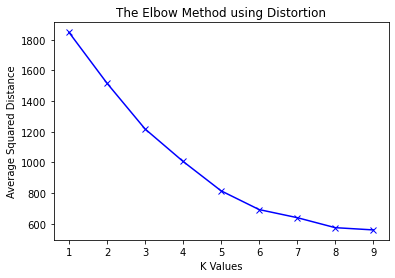

In [ ]:
plt.plot(Range, squared_distance, 'bx-')
plt.xlabel('K Values')
plt.ylabel('Average Squared Distance')
plt.title('The Elbow Method using Distortion')
plt.show()

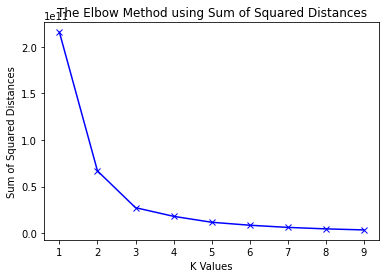

In [ ]:
plt.plot(Range, sum_squared_distance, 'bx-')
plt.xlabel('K Values')
plt.ylabel('Sum of Squared Distances')
plt.title('The Elbow Method using Sum of Squared Distances')
plt.show()

* In the elbow method, we choose the elbow of the curve as the number of clusters to use
* Observing the graphs above, k = 3 and k = 6 shows a change in slope
* So the possible number of clusters can be either 3 or 6

## **Creating Segments using KMeans:**

* Using k = 3 gives three clusters,
* One of which contains 3000 observations, while the other contained 4
* The vast difference in cluster size indicates that there are outliers.
* So we must choose a larger k value. The elbow method using distortion shows that 
* The next possible largest "elbow" or k-value is 6, which could give a more varied distribution

In [ ]:
kmean_method = KMeans(n_clusters=6).fit(merged_np)
kmean_method.fit(merged_np)

KMeans(n_clusters=6)

In [ ]:
merged["KMean_Cluster"] = np.nan

In [ ]:
for indx, row in merged.iterrows():
    merged.iloc[indx,4] = (kmean_method.predict(merged.iloc[indx,:][["Recency", "Frequency", "Monetary"]].to_numpy().reshape(1, -1))[0])

In [ ]:
merged.head()

,CustomerID,Recency,Frequency,Monetary,KMean_Cluster
0,12347.0,0,122,3122.82,5.0
1,12348.0,3,8,677.00,0.0
2,12349.0,1,73,1757.55,0.0
3,12352.0,1,47,944.23,0.0
4,12353.0,7,4,89.00,0.0


In [ ]:
merged.KMean_Cluster.value_counts()

0.0    3280
5.0     488
3.0      55
2.0      18
4.0       5
1.0       4
Name: KMean_Cluster, dtype: int64

## Plotting the KMeans Clusters with Implot

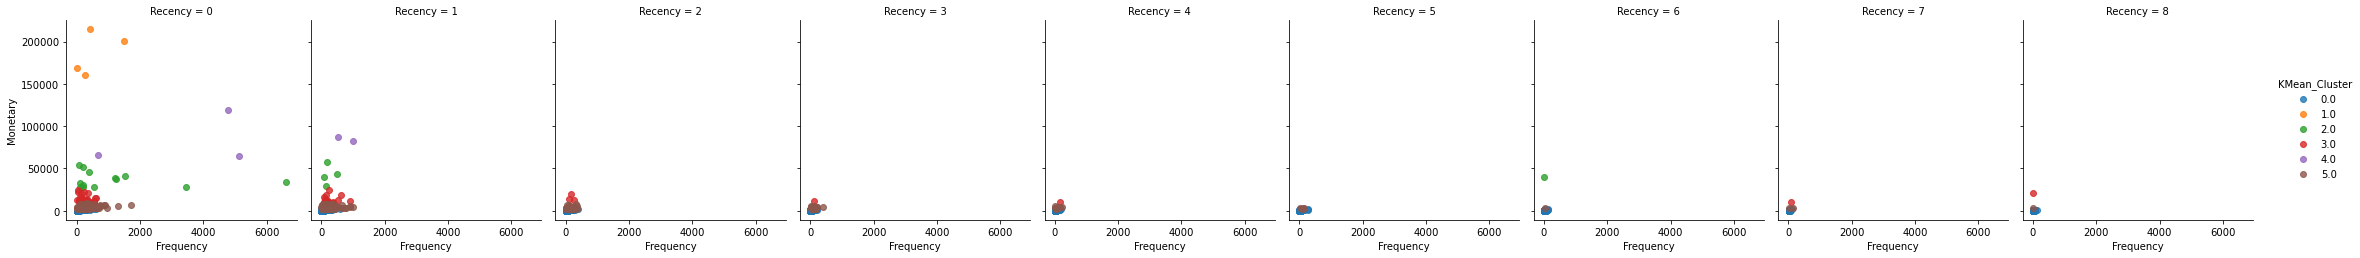

In [ ]:
# Plotting the cluster on its own plane separately:
sns.lmplot(x ="Frequency", y ="Monetary", fit_reg=False, hue="KMean_Cluster", col="Recency", data=merged, height = 3.5)

## Print and Analyze the Cluster Centers

In [ ]:
#There are six clusters: Recency, Monetary, and Frequency centers for each cluster are given below:
for cluster in kmean_method.cluster_centers_:
    print(f"Recency: {round(cluster[0], 2)}\tFrequency: {round(cluster[1], 2)}\tMonetary: {round(cluster[2], 2)}")

Recency: 2.56	Frequency: 47.91	Monetary: 678.82
Recency: 0.0	Frequency: 532.25	Monetary: 186032.31
Recency: 0.56	Frequency: 924.56	Monetary: 38263.92
Recency: 0.77	Frequency: 251.34	Monetary: 13457.96
Recency: 0.4	Frequency: 2415.8	Monetary: 83724.11
Recency: 0.97	Frequency: 198.82	Monetary: 3864.9


## **Taking top listed row as cluster 1, second listed row as cluster 2, etc.**

## 🟣 **CLUSTER 1 : (Observe)**


* Cluster 1 has the higest recency value out of all the clusters, indicating that the users in this cluster have the most recent purchases out of all the clusters. 
* As these customers are the online retail's most recent customers, they are likely to remember and revisit this online retail in the future. 


* Paired with the low frequency and monetary values, one can assume that these customers are new to shopping at this online retail.
* They just started shopping recently, hence the high recency, but have not made many purchases yet, (low monetary value) indicating that they may be new.

To be done:
* The retailer must observe their behavior in the near future to assess how to approach them.
* As they are recent/new customers, they'll have the retail's name fresh in their mind and will likely revisit it.



---



## 🟣 **CLUSTER 2: (need work)**


* These customers have the lowest recency value (0.0), indicating that they have shopped very little to none in the specified time range.
* However, their frequency value is ten times that of cluster 1. They also have the highest monetary value out of all clusters. 
* Thus this group may consist of customers who previously spent a lot of money at this online retail, but have lost interest (previously loyal customers, thus the lower-than-expected frequency as well).

To be done:
* a) Examine why these customers suddenly dropped interest in their retail to see if there are any issues that must be immediately addressed, or changes to be implemented, so that this behavior is not replicated by other customers in the future.
* b) Needs to rekindle these customers's interest in the retail as they have to potential to once again contribute significantly to the retail's profit. 



---



## 🟣 **CLUSTERS 3 AND 5 (increase engagement):**


* Clusters 3 and 5's customers are the third and second-highest-spending customers the online retail has, respectively (3rd and 5th highest monetary values). They have similar recency values (close to 0.65) as well. 
* This implies that both clusters moderately frequently visit the online retail, but are high spenders. 
* Cluster 5 however has a larger frequency value than cluster 3. 


To be done:
* So while both clusters significantly contribute to the retail's current success, the retail can focus on advertising to these customers to increase their shopping frequency,since these customers have shown that they trust this retail and are willing to spend large amounts of money as well.



---




## 🟣 **CLUSTER 4 (need work):**


* These customers have the second highest recency out of all the clusters, but the second lowest frequencies and monetary values.
* This may translate to customers who in the speicifed period, visited the online retail, tried and purchased a few items from it, but may have been dissatisfied with its service and discontinued using it.

To be done:
* Like for cluster 2, the retail must figure what caused these customers to lose interest in the brand, and whether there were any negative effects/first impressions that may hurt future customers as well.
* Unlike cluster 2, these customers have not shown loyalty to this retail, so the retail can redirect their adveritisng efforts to other clusters that show potential.



---



## 🟣 **CLUSTER 6:**

* Cluster six bears similarity in terms of recency to clusters 3 and 5, however its frequency and monetary values are must lower.
* However, it's monetary value is not low enough to indicate complete disinterest in the retail. 


To be done:
* Using clusters 3 and 5 as reference, if the retail could increase cluster 6's frequency value, they may increase their monetary values as well.

## **Creating Segments with Agglomerative Clustering**

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
agglomerative_clustering_model = AgglomerativeClustering(n_clusters=6).fit(merged_np)
agglomerative_clustering_model.fit(merged_np)

AgglomerativeClustering(n_clusters=6)

In [ ]:
merged["clusterID_AggClustering"] = np.nan

for indx, row in merged.iterrows():
    merged.iloc[indx,5] = agglomerative_clustering_model.labels_[indx]

In [ ]:

merged.clusterID_AggClustering.value_counts()

4.0    3494
0.0     319
5.0      18
2.0      12
1.0       4
3.0       3
Name: clusterID_AggClustering, dtype: int64

## **Plotting the Agglomerative Method Clusters:**

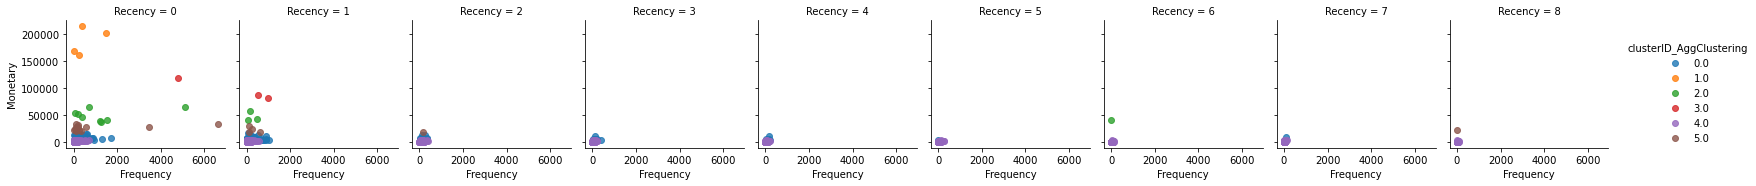

In [ ]:
# agglomerative clustering
sns.lmplot(x ="Frequency", y ="Monetary", fit_reg=False, hue="clusterID_AggClustering", col="Recency", data=merged, height = 2.5)

## **Visualize the clusters using a dendogram**

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

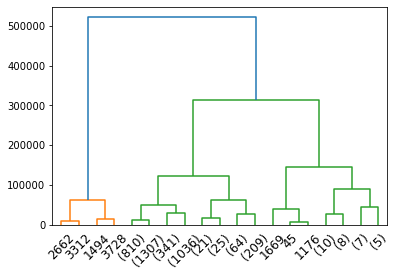

In [ ]:
agg_model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
agg_model.fit(merged_np)
plot_dendrogram(agg_model, truncate_mode="level", p=4, leaf_rotation= 45)

## **Comparing the two methods:**

* Although there are some changes in the cluster sizes (396 (Kmeans) to 319 (agg), 43 (Kmeans) to 18 (agg)), overall the clusters are pretty similar
* But the smaller clusters have reduced in size with agglomerative clustering, which may suggest that the smaller clusters must be merged together.


* Considering that using the KMeans method, I could identify close to 3 clusters with similar recencies and frequencies, (which could have been merged together), maybe I should have chosen a number greater than 3, but fewer than 6 as a value for k (either 4 or 5).
* The difference between cluster size distribution is rather small, and so they may not produce much difference in the analysis results for both methods.



---


* I personally found it easier to analyze each cluster using the KMeans method, as I could analyze the centers of the KMeans clusters, and use the RFM values to hypothesize which clsuter may need what type of attention from the online retail. 
* It was difficult to find the cluster centers using the agglomerative method 